# Example of usage Spark OCR original file formatting keeper

## Install spark-ocr python packge
Need specify license and path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
AWS_ACCESS_KEY_ID = ""
AWS_SECRET_ACCESS_KEY = ""

version = secret.split("-")[0]
spark_ocr_jar_path = "../../spark-ocr/target/scala-2.12/" #"../../target/scala-2.12/"

In [2]:
# install from PYPI using secret
#%pip install spark-ocr==$version+spark30 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

In [3]:
import os

if license:
    os.environ['JSL_OCR_LICENSE'] = license

## Initialization of spark session

In [4]:
from pyspark import SparkConf
from sparkocr import start

if license:
    os.environ['SPARK_OCR_LICENSE'] = license

spark = start(jar_path = spark_ocr_jar_path, nlp_version="3.2.3")

spark

Spark version: 3.0.2
Spark NLP version: 3.3.2
Spark OCR version: 3.9.0



## Import OCR transformers

In [5]:
from sparkocr.transformers import *
from sparkocr.enums import *
from pyspark.ml import PipelineModel
from sparkocr.utils import *

## Show original file


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/data/keeplayout/p1.jpg
    Resolution: 72 dpi
    Width: 3000 px
    Height: 3873 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


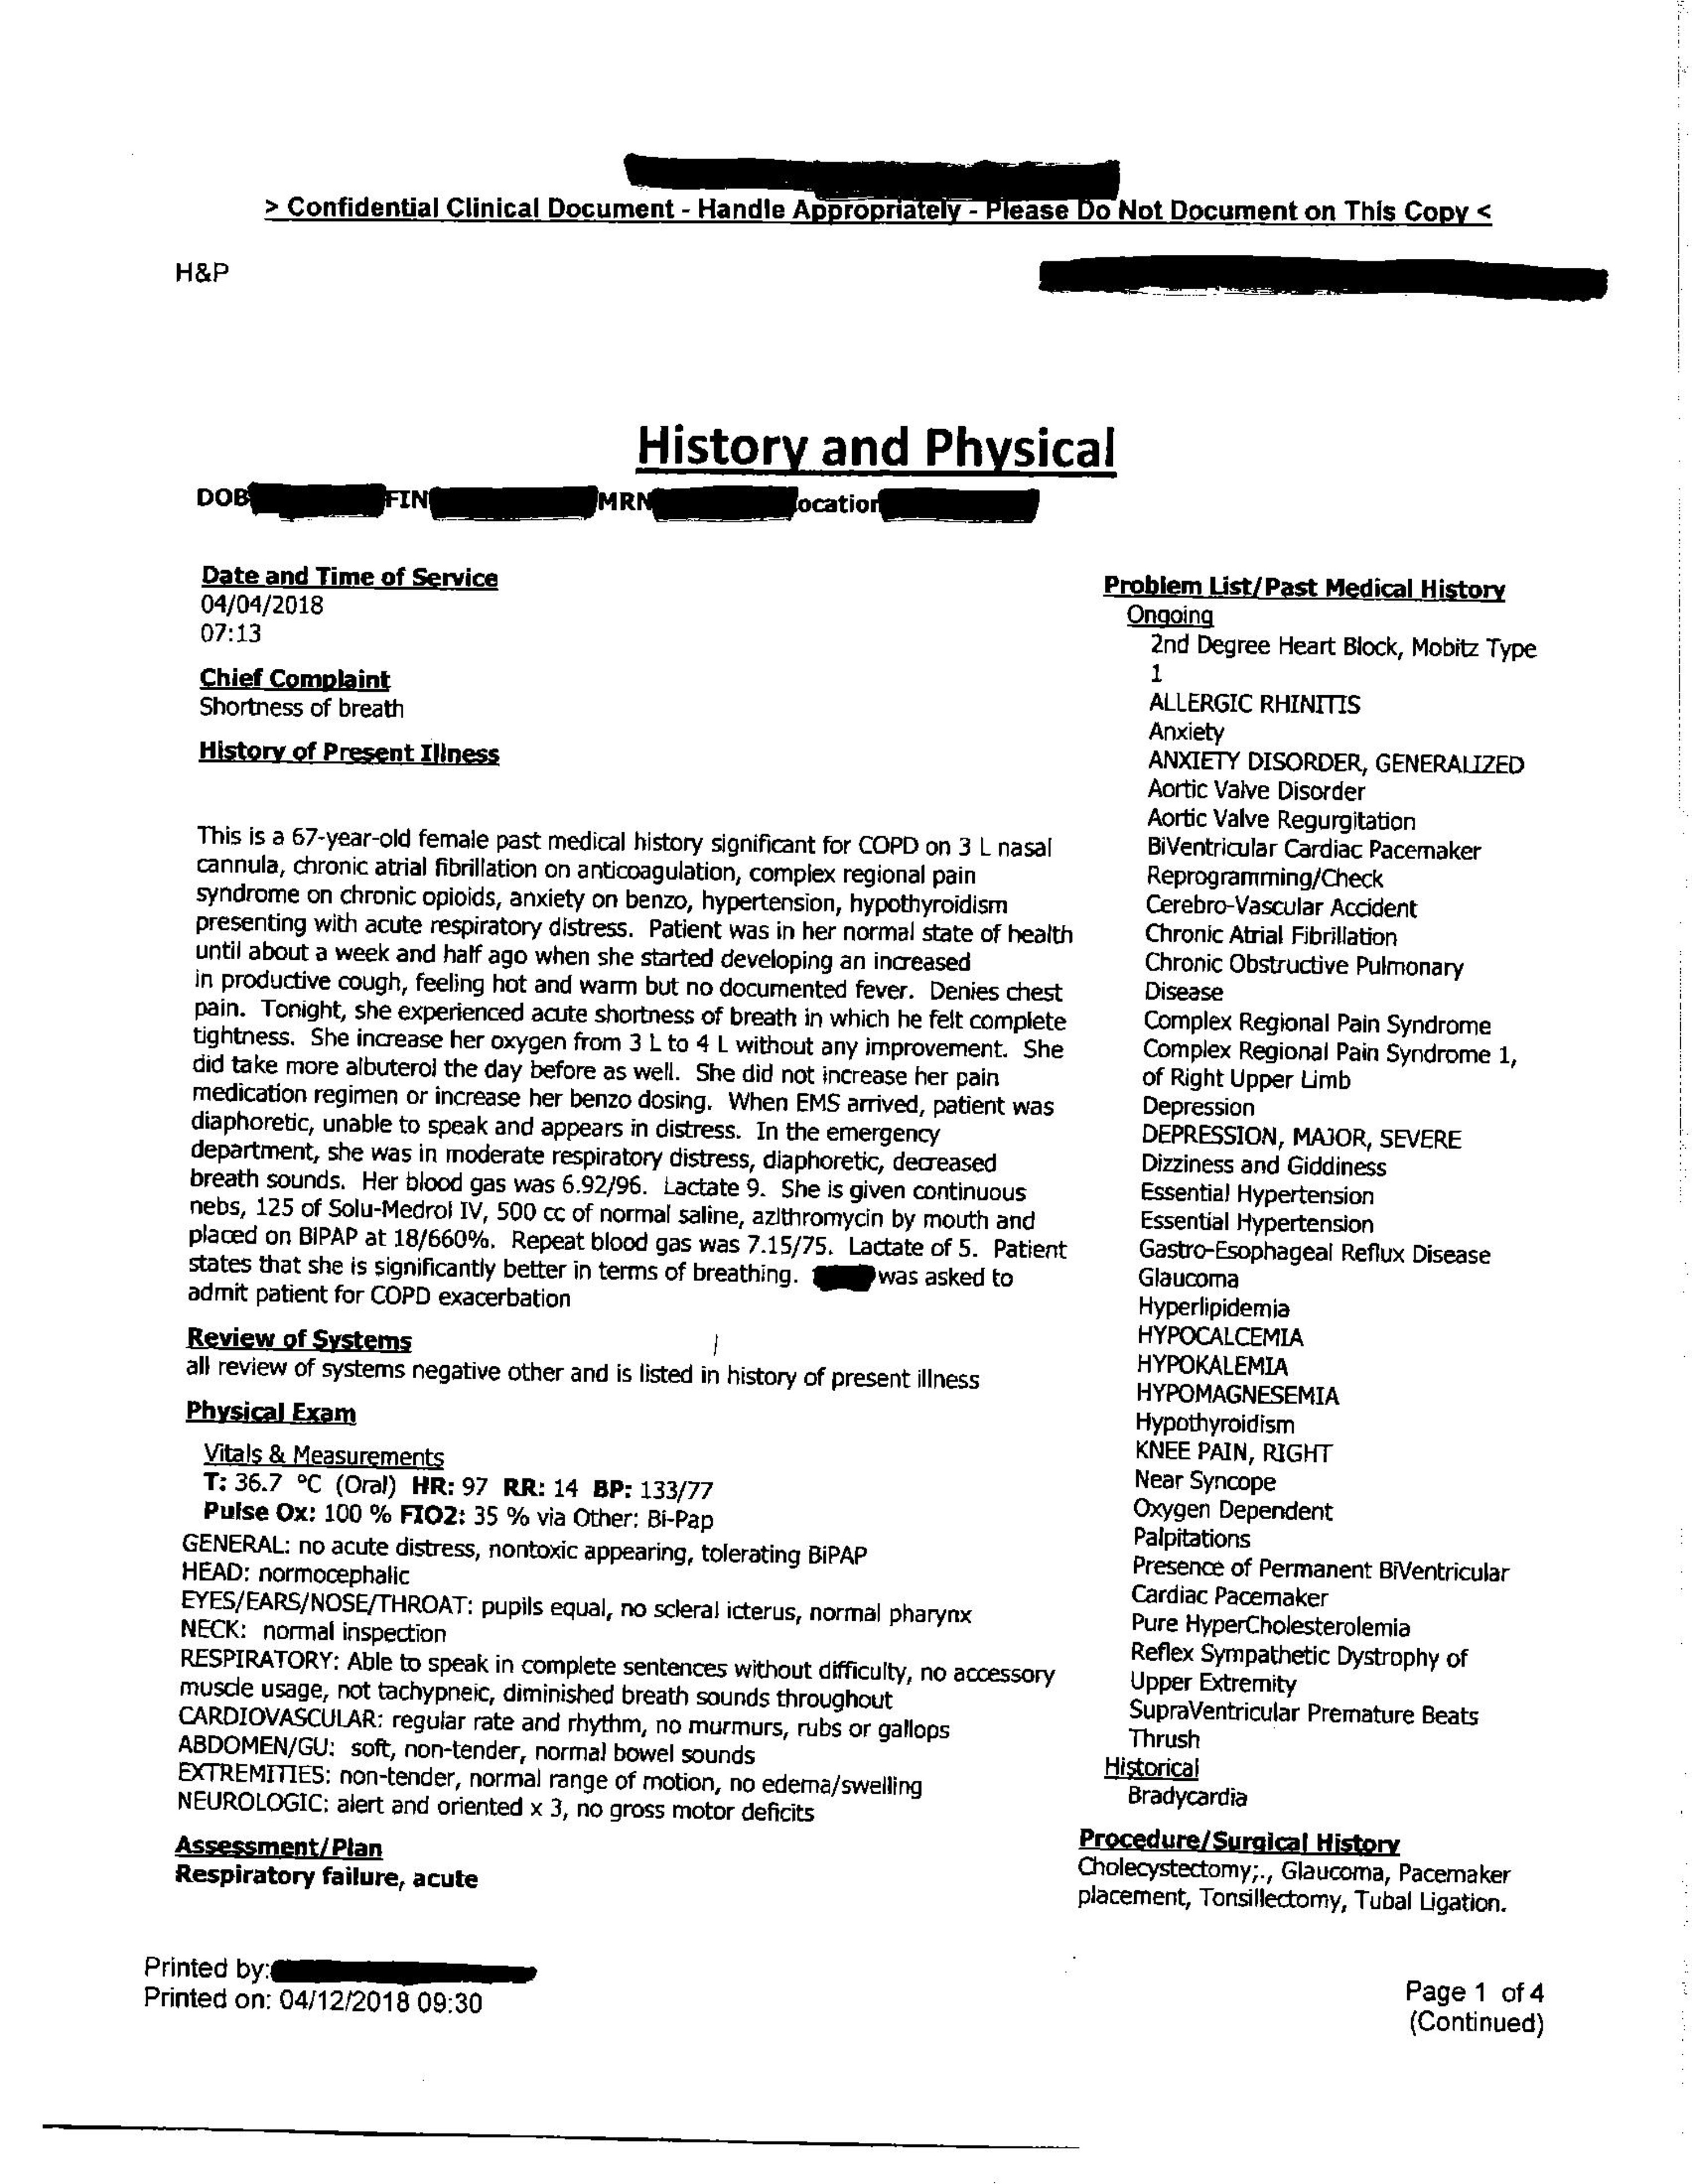

In [6]:
image_raw = spark.read.format("binaryFile").load("data/keeplayout/p1.jpg").cache()
example_df = BinaryToImage().transform(image_raw)
display_images(example_df)

In [11]:
%%html   
<style type='text/css'>
.CodeMirror{
font-size: 15px;
}

div.output_area pre {
    font-size: 4px;

</style>

## Sample of missing formatting during OCR on image

In [8]:
def pipeline_nolayout():
    skew =  ImageSkewCorrector() \
        .setInputCol("image") \
        .setOutputCol("corrected_image") \
        .setAutomaticSkewCorrection(True)
    
    ocr = ImageToText() \
        .setInputCol("corrected_image") \
        .setOutputCol("text")
    
    pipeline = PipelineModel(stages=[
        skew,
        ocr
    ])
    
    return pipeline

result_bin = pipeline_nolayout().transform(example_df).cache()
print(result_bin.select("text").collect()[0].text)

> Confidential Clinical Document - Handle eae = io - Not Document on This Copy <

H&P

History and Physical
DOC RN CS kU 0catio SS

Date and Time of Service
04/04/2018

07:13

hi in
Shortness of breath
H P ntI

This is a 67-year-old female past medical history significant for COPD on 3 L nasal
cannula, chronic atrial fibrillation on anticoagulation, complex regional pain
syndrome on chronic opioids, anxiety on benzo, hypertension, hypothyroidism
presenting with acute respiratory distress. Patient was in her normal state of health
until about a week and half ago when she started developing an increased

in productive cough, feeling hot and warm but no documented fever. Denies chest
pain. Tonight, she experienced acute shortness of breath in which he felt complete
tightness. She increase her oxygen from 3 L to 4 L without any improvement. She
did take more albuterol the day before as well. She did not increase her pain
medication regimen or increase her benzo dosing. When EMS arrived, pa

## Sample of keeping formatting during OCR on image

In [10]:
def pipeline_keeplayout():
    skew =  ImageSkewCorrector() \
        .setInputCol("image") \
        .setOutputCol("corrected_image") \
        .setAutomaticSkewCorrection(True)

    ocr = ImageToText() \
        .setInputCol("corrected_image") \
        .setOutputCol("text") \
        .setOcrParams(["preserve_interword_spaces=1", ]) \
        .setKeepLayout(True) \
        #.setOutputSpaceCharacterWidth(8)
    
    pipeline = PipelineModel(stages=[
        skew,
        ocr
    ])
    
    return pipeline

result2 = pipeline_keeplayout().transform(example_df).cache()
print(result2.select("text").collect()[0].text)


                                                                                                                                                                                                                                                                                                                                        <                                                      
                                                           >    Confidential                       Clinical               Document                     -   Handle                                                      =   io                           Not         Document                     on       This          Copy                                                                   
                                        H&P                                                                                                                                                                                             